In [4]:
import torch
import torch.nn as nn

from torch.utils.data import DataLoader

import torchvision
from torchvision import transforms

from tqdm.notebook import tqdm

In [39]:
mnist_trainset = torchvision.datasets.MNIST(root='../datasets/MNIST/', train=True, download=True, transform=transforms.ToTensor())
mnist_testset = torchvision.datasets.MNIST(root='../datasets/MNIST', train=False, download=True, transform=transforms.ToTensor())

data_loading_params = {'batch_size': 32,
                       'shuffle': True,
                       'num_workers': 6
                      }

train_data = torch.utils.data.DataLoader(mnist_trainset, **data_loading_params)
test_data = torch.utils.data.DataLoader(mnist_testset, **data_loading_params)

In [40]:
class AutoEncoder(nn.Module):
    def __init__(self):
        super(AutoEncoder, self).__init__()
        
        self.encoder = nn.Sequential(
            nn.Conv2d(1, 16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(16, 8, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(8, 16, 
                               kernel_size=3, 
                               stride=2, 
                               padding=1, 
                               output_padding=1),
            nn.ReLU(),
            nn.ConvTranspose2d(16, 1, 
                               kernel_size=3, 
                               stride=2, 
                               padding=1, 
                               output_padding=1),
            nn.Sigmoid()
        )
         
    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

In [41]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [42]:
learning_rate = 1e-3
num_epochs = 10
# ---

model = AutoEncoder().to(device)
criterion = nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

for epoch in tqdm(range(num_epochs), unit='epoch'):

    for batch, targets in tqdm(train_data, leave=False):

        batch, targets = batch.to(device), targets.to(device)
        
        outs = model(batch)
        loss = criterion(outs, batch)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

  0%|          | 0/10 [00:00<?, ?epoch/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

  0%|          | 0/1875 [00:00<?, ?it/s]

<Figure size 1600x1200 with 0 Axes>

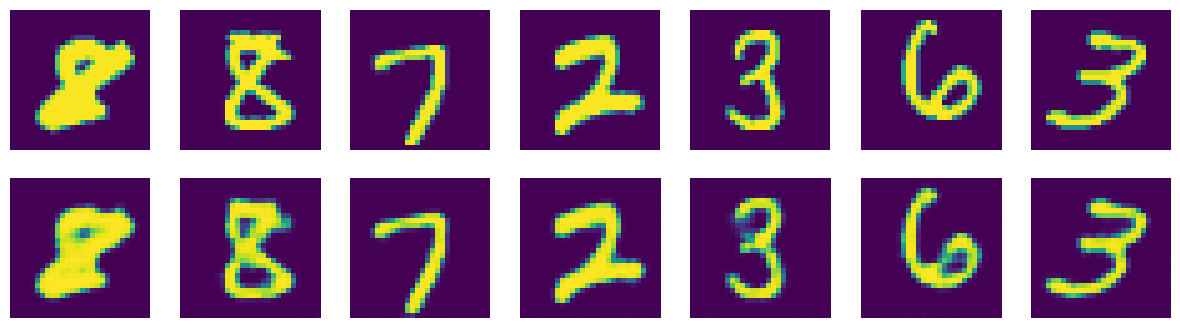

In [44]:
with torch.no_grad():
    for data, _ in test_data:
        data = data.to(device)
        recon = model(data)
        break
         
import matplotlib.pyplot as plt
plt.figure(dpi=250)
fig, ax = plt.subplots(2, 7, figsize=(15, 4))
for i in range(7):
    ax[0, i].imshow(data[i].cpu().numpy().transpose((1, 2, 0)))
    ax[1, i].imshow(recon[i].cpu().numpy().transpose((1, 2, 0)))
    ax[0, i].axis('OFF')
    ax[1, i].axis('OFF')
plt.show()
